# Памятка
переменные, которые содержит датасет:

1. **school** — аббревиатура школы, в которой учится ученик

2. **sex** — пол ученика ('F' - женский, 'M' - мужской)

3. **age** — возраст ученика (от 15 до 22)

4. **address** — тип адреса ученика ('U' - городской, 'R' - за городом)

5. **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

6. **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. **failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. **schoolsup** — дополнительная образовательная поддержка (yes или no)

17. **famsup** — семейная образовательная поддержка (yes или no)

18. **paid** — дополнительные платные занятия по математике (yes или no)

19. **activities** — дополнительные внеучебные занятия (yes или no)

20. **nursery** — посещал детский сад (yes или no)

21. **higher** — хочет получить высшее образование (yes или no)

22. **internet** — наличие интернета дома (yes или no)

23. **romantic** — в романтических отношениях (yes или no)

24. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. **absences** — количество пропущенных занятий

29. **score** — баллы по госэкзамену по математике

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.csv')

In [90]:
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [91]:
# доп. функции

# функция замены NaN на None
def replase_nan(x):
    return np.nan if str(x).strip().lower() == 'nan' else x

# функция замены пустых строк на None
def replase_empty(x):
    return None if str(x).strip() == '' else x

# функция замены строковых значений yes/no на числовые аналоги 1/0 соответственно
def replase_yes_no(x):
    return int(str(x).strip().lower() == 'yes')

Заменим все пустые строки, None на NaN
Для этого воспользуемся функциями replase_nan() и replase_empty(), описанными выше, а также встренной в pandas методом .fillna()

In [92]:
for column in df.columns:
    df[column] = df[column].apply(replase_nan)
    df[column] = df[column].apply(replase_empty)
df = df.fillna(value=np.nan)
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
28,GP,M,16,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
230,GP,F,17,U,LE3,T,4.0,3.0,health,other,reputation,father,1.0,2.0,0.0,no,no,no,yes,yes,-6.0,yes,yes,yes,3.0,2.0,3.0,3.0,14.0,70.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,NaN,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
347,GP,M,18,U,GT3,T,4.0,3.0,teacher,other,course,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,NaN,yes,yes,NaN,4.0,5.0,5.0,0.0,45.0
78,GP,M,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0


# school — аббревиатура школы, в которой учится ученик

,school
GP,349
MS,46


<AxesSubplot:>

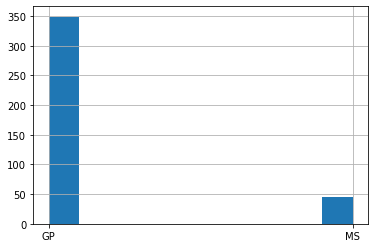

In [93]:
# посмотрим сколько школ учавствовало в опросе
display(pd.DataFrame(df.school.value_counts()))
df.school.hist()

Как видно, распределение не равномерное. Возможно даннный параметр понадобится для составления итоговой модели, оставим его.

# sex — пол ученика

,sex
F,208
M,187


<AxesSubplot:>

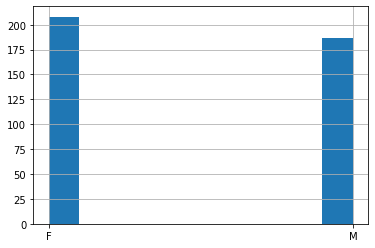

In [94]:
# Посмотрим сколько представителей каждого пола учавстсвовало в опросе
display(pd.DataFrame(df.sex.value_counts()))
df.sex.hist()

В датасете примерно равное соотношение полов детей. Данный параметр так же может пригодиться.

# age — возраст ученика

[18 17 15 16 19 22 20 21]


,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


<AxesSubplot:>

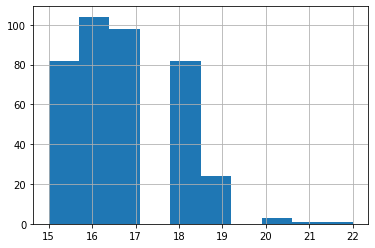

In [95]:
print(df.age.unique())
display(pd.DataFrame(df.age.value_counts()))
df.age.hist()

Заметим что в опросе, в основном, участвовали дети в возрасте от 15 до 18 лет.

# address — тип адреса ученика ('U' - городской, 'R' - за городом)

['U' nan 'R']


,address
U,295
R,83


<AxesSubplot:>

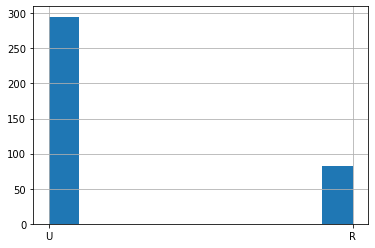

In [96]:
print(df.address.unique())
display(pd.DataFrame(df.address.value_counts()))
df.address.hist()

Здесь мы видим что представленных в датасете школах больше учеников, проживающих в городе.
Данный параметр косвенно отражает условия жизни учащихся, поэтому есть вероятность корреляции с итоговой оценкой по математике (score)

# famsize — размер семьи('LE3' <= 3, 'GT3' >3)

[nan 'GT3' 'LE3']


,famsize
GT3,261
LE3,107


<AxesSubplot:>

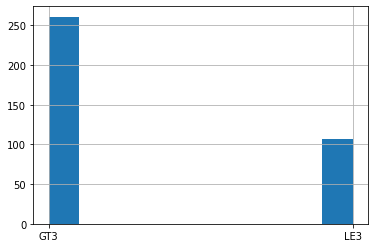

In [97]:
print(df.famsize.unique())
display(pd.DataFrame(df.famsize.value_counts()))
df.famsize.hist()

Как показывает практика психологов, полнота семьи имеет влияние на успеваемость учеников, однако по данным показателям трудно оценить семья из 3х и более человек полная, или же, к примеру, мать-одинчка воспитывает двух и более детей. Следовательно данная характеристика может иметь влияние на итоговую оценку по математике.

# Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

['A' nan 'T']


,Pstatus
T,314
A,36


<AxesSubplot:>

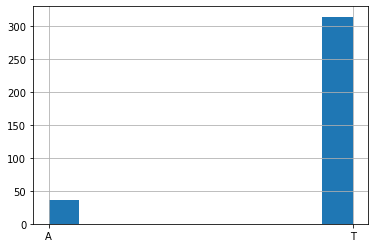

In [98]:
print(df.Pstatus.unique())
display(pd.DataFrame(df.Pstatus.value_counts()))
df.Pstatus.hist()

Данный параметр, вероятно, слабо влияет на параметр score.

# Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

[ 4.  1.  3.  2. nan  0.]


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<AxesSubplot:>

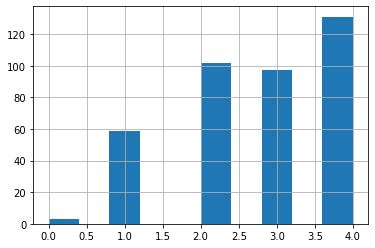

In [99]:
print(df.Medu.unique())
display(pd.DataFrame(df.Medu.value_counts()))
df.Medu.hist()

# Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

[ 4.  1.  2.  3. 40. nan  0.]


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<AxesSubplot:>

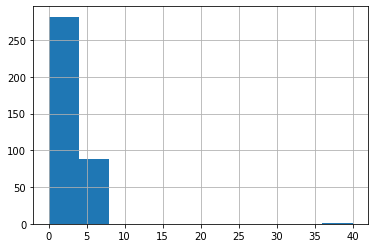

In [100]:
print(df.Fedu.unique())
display(pd.DataFrame(df.Fedu.value_counts()))
df.Fedu.hist()

По данным видно что в этом столбце присутсвуют показания, выходящие за границу допустимых значений. Исправим это:

array([ 4.,  1.,  2.,  3., nan,  0.])

<AxesSubplot:>

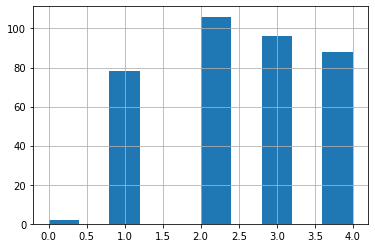

In [101]:
df.Fedu = df.Fedu[df.Fedu.between(0, 4)]
display(df.Fedu.unique())
df.Fedu.hist()

Образование родителей, зачастую, имеет положительное влияние на успеваимость ребёнка, следовательно, вероятно наличие положительной корреляции с параметром score.

# Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

['at_home' 'health' 'other' 'services' 'teacher' nan]


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


<AxesSubplot:>

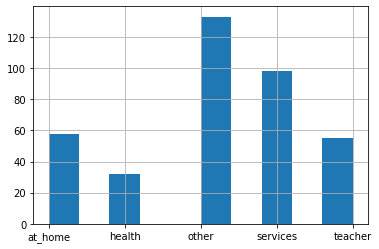

In [102]:
print(df.Mjob.unique())
display(pd.DataFrame(df.Mjob.value_counts()))
df.Mjob.hist()

# Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

['teacher' 'other' nan 'health' 'services' 'at_home']


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


<AxesSubplot:>

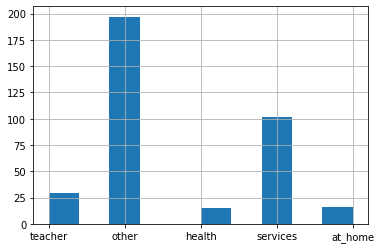

In [103]:
print(df.Fjob.unique())
display(pd.DataFrame(df.Fjob.value_counts()))
df.Fjob.hist()

Работа родителей может влиять на успеваимость ребёнка, но очень слабо.

# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

['course' 'other' 'home' 'reputation' nan]


,reason
course,137
home,104
reputation,103
other,34


<AxesSubplot:>

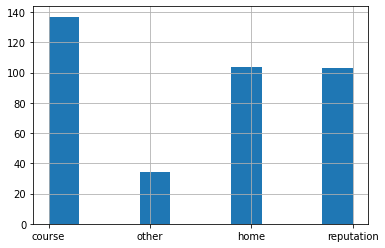

In [104]:
print(df.reason.unique())
display(pd.DataFrame(df.reason.value_counts()))
df.reason.hist()

Гипотетически, причина выбора школы, если и влияет на итоговую оценку, то очень слабо.

# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

['mother' 'father' 'other' nan]


,guardian
mother,250
father,86
other,28


<AxesSubplot:>

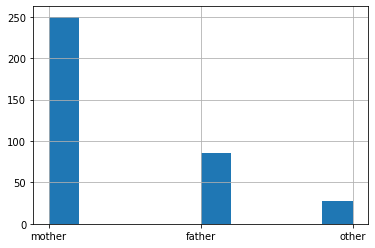

In [105]:
print(df.guardian.unique())
display(pd.DataFrame(df.guardian.value_counts()))
df.guardian.hist()

# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

[ 2.  1.  3. nan  4.]


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<AxesSubplot:>

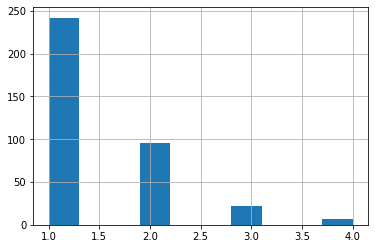

In [106]:
print(df.traveltime.unique())
display(pd.DataFrame(df.traveltime.value_counts()))
df.traveltime.hist()

# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

[ 2.  3.  1. nan  4.]


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<AxesSubplot:>

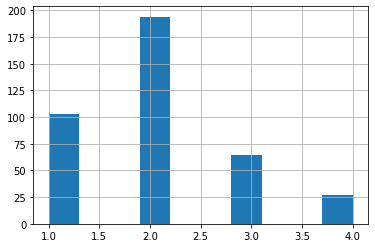

In [107]:
print(df.studytime.unique())
display(pd.DataFrame(df.studytime.value_counts()))
df.studytime.hist()

# failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

[ 0.  3. nan  2.  1.]


,failures
0.0,293
1.0,49
2.0,16
3.0,15


<AxesSubplot:>

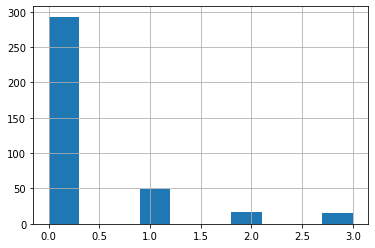

In [108]:
print(df.failures.unique())
display(pd.DataFrame(df.failures.value_counts()))
df.failures.hist()

# schoolsup — дополнительная образовательная поддержка (yes или no)

['yes' 'no' nan]


,schoolsup
no,335
yes,51


<AxesSubplot:>

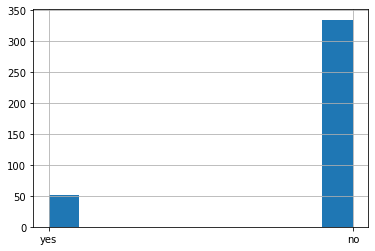

In [109]:
print(df.schoolsup.unique())
display(pd.DataFrame(df.schoolsup.value_counts()))
df.schoolsup.hist()

# famsup — семейная образовательная поддержка (yes или no)

['no' 'yes' nan]


,famsup
yes,219
no,137


<AxesSubplot:>

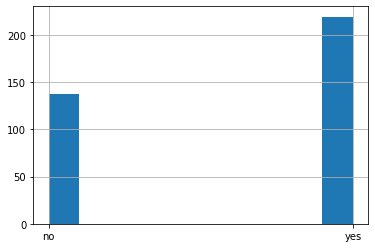

In [110]:
print(df.famsup.unique())
display(pd.DataFrame(df.famsup.value_counts()))
df.famsup.hist()

Дополнительная поддержка в образовании в школе и дома должны сильно влиять на итоговую оценку.

# paid — дополнительные платные занятия по математике (yes или no)

['no' nan 'yes']


,paid
no,200
yes,155


<AxesSubplot:>

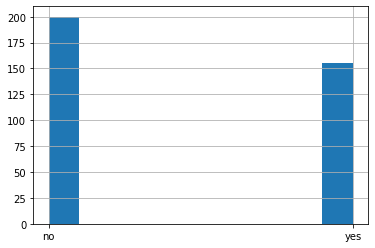

In [111]:
print(df.paid.unique())
display(pd.DataFrame(df.paid.value_counts()))
df.paid.hist()

Данный параметр, гипотетически, имеет прямое влияние на показатель параметра score

# activities — дополнительные внеучебные занятия (yes или no)

['no' 'yes' nan]


,activities
yes,195
no,186


<AxesSubplot:>

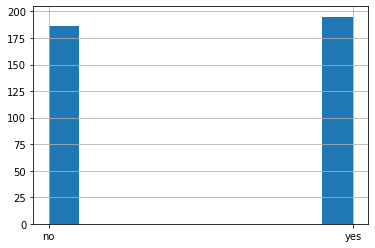

In [112]:
print(df.activities.unique())
display(pd.DataFrame(df.activities.value_counts()))
df.activities.hist()

Аналогично предыдущему параметру (paid), корреляция с пораметром score должна быть весомой.

# nursery — посещал детский сад (yes или no)

['yes' 'no' nan]


,nursery
yes,300
no,79


<AxesSubplot:>

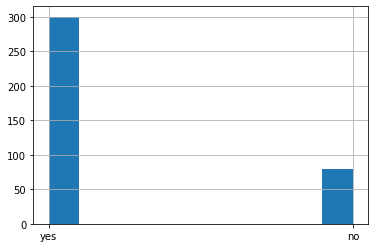

In [113]:
print(df.nursery.unique())
display(pd.DataFrame(df.nursery.value_counts()))
df.nursery.hist()

Посещение детского сада должно повлиять на качество обучения в школе, следовательно между данным параметром и score может быть положительная корреляция.

# higher — хочет получить высшее образование (yes или no)

['yes' nan 'no']


,higher
yes,356
no,19


<AxesSubplot:>

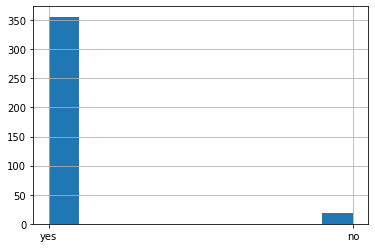

In [114]:
print(df.higher.unique())
display(pd.DataFrame(df.higher.value_counts()))
df.higher.hist()

Желание получить высшее образование может положительно влиять на результативность ученика, следовательно может быть положительная корреляция с параметром score.

# internet — наличие интернета дома (yes или no)

[nan 'yes' 'no']


,internet
yes,305
no,56


<AxesSubplot:>

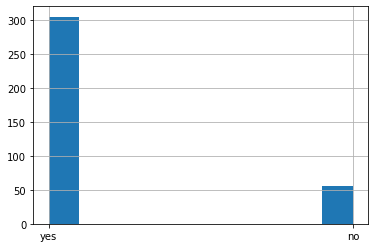

In [115]:
print(df.internet.unique())
display(pd.DataFrame(df.internet.value_counts()))
df.internet.hist()

Наличие интернета может коррелировать с итоговой оценкой по математике, но нельзя точно сказать положительной будет корреляция или отрицательной.

# romantic — в романтических отношениях (yes или no)

['no' nan 'yes']


,romantic
no,240
yes,124


<AxesSubplot:>

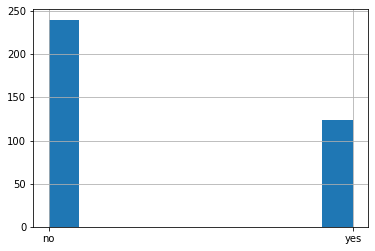

In [116]:
print(df.romantic.unique())
display(pd.DataFrame(df.romantic.value_counts()))
df.romantic.hist()

Гипотетически, романтические отношения могут влиять на итоговую оценку.

# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

[ 4.  5.  3. nan -1.  2.  1.]


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<AxesSubplot:>

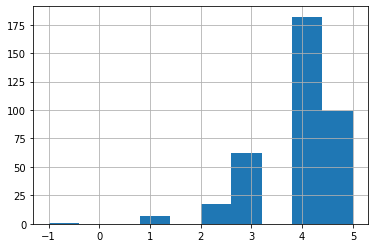

In [118]:
print(df.famrel.unique())
display(pd.DataFrame(df.famrel.value_counts()))
df.famrel.hist()

В данных присутствую значения, выходящие за грацину допустимых значений.

[ 4.  5.  3. nan  2.  1.]


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7


<AxesSubplot:>

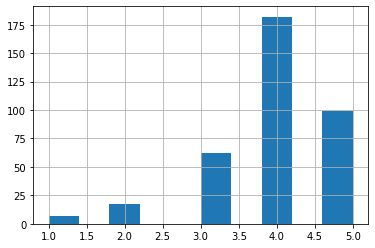

In [119]:
df.famrel = df.famrel[df.famrel.between(1, 5)]
print(df.famrel.unique())
display(pd.DataFrame(df.famrel.value_counts()))
df.famrel.hist()

# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

[ 3.  2.  4.  1.  5. nan]


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<AxesSubplot:>

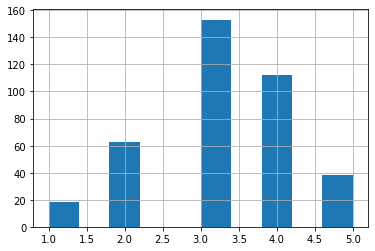

In [120]:
print(df.freetime.unique())
display(pd.DataFrame(df.freetime.value_counts()))
df.freetime.hist()

# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

[ 4.  3.  2.  1.  5. nan]


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<AxesSubplot:>

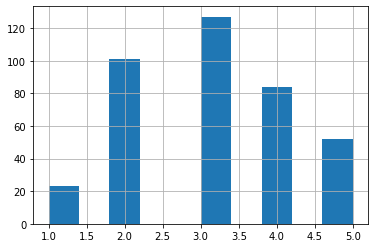

In [121]:
print(df.goout.unique())
display(pd.DataFrame(df.goout.value_counts()))
df.goout.hist()

# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

[ 3.  5.  1.  2.  4. nan]


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<AxesSubplot:>

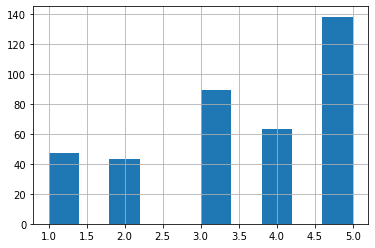

In [122]:
print(df.health.unique())
display(pd.DataFrame(df.health.value_counts()))
df.health.hist()

# absences — количество пропущенных занятий

[  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


<AxesSubplot:>

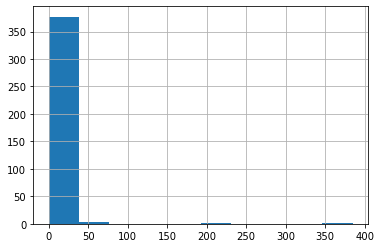

In [123]:
print(df.absences.unique())
display(pd.DataFrame(df.absences.value_counts()))
df.absences.hist()

Очевидно в данных присутствуют выбросы. Исправим это:

[ 6.  4. 10.  2.  0. 16. nan 14.  7.  8. 12. 18. 20.  5. 13. 15.  3.  1.
 19.  9. 11. 17.]


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<AxesSubplot:>

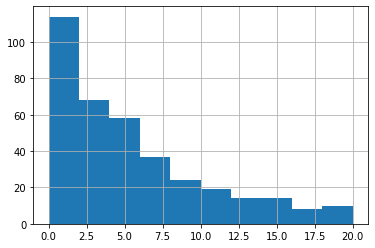

In [128]:
Q1 = df.absences.quantile(0.25)
Q3 = df.absences.quantile(0.75)
IQR = Q3 - Q1
df.absences = df.absences[df.absences.between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)]

print(df.absences.unique())
display(pd.DataFrame(df.absences.value_counts()))
df.absences.hist()

# score — баллы по госэкзамену по математике

[ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


<AxesSubplot:>

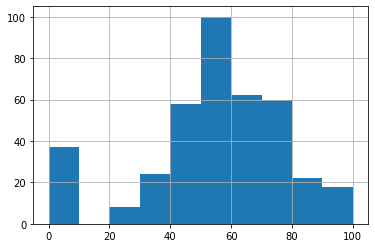

In [124]:
print(df.score.unique())
display(pd.DataFrame(df.score.value_counts()))
df.score.hist()

## Промежуточные выводы.
В ходе первичного осмотра данных выявлено что данные достаточно чистые, выдвинуты некоторые гипотезы.
Проведём корреляционный анализ и анализ номинативных переменных.

# Корреляционный анализ